In [1]:
import numpy as np

def sigmoid(x):
  return 1. / (1. + np.exp(-x))

def numerical_derivative(f, x):
  delta_x = 1e-4 # 0.0001
  grad = np.zeros_like(x)

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]

    x[idx] = float(tmp_val) + delta_x
    fx1 = f(x) # f(x + delta_x)

    x[idx] = float(tmp_val) - delta_x
    fx2 = f(x) # f(x - delta_x)

    grad[idx] = (fx1 - fx2) / (2 * delta_x)

    x[idx] = tmp_val
    it.iternext()

  return grad

In [2]:
# 논리게이트 (Logic gate) 클래스 구현
class LogicGate:
  def __init__(self, gate_name, xdata, tdata): # xdata, tdata, W, b 초기화
    self.name = gate_name
    self.xdata = xdata.reshape(4, 2) # 입력 데이터 초기화
    self.tdata = tdata.reshape(4, 1) # 정답 데이터 초기화

    # 입력층 노드 2개, 은닉층 노드 4개, 은닉층 개수는 적당한 값으로 지정
    self.W1 = np.random.rand(2, 4)
    self.b1 = np.random.rand(4)

    # 입력층 노드 2개, 은닉층 노드 6개, 은닉층 개수는 적당한 값으로 지정
    self.W2 = np.random.rand(4, 6)
    self.b2 = np.random.rand(6)

    # 은닉층 노드 6개, 출력층 노드 4개
    self.W3 = np.random.rand(6, 4)
    self.b3 = np.random.rand(4)

    # 은닉층 노드 4개, 출력층 노드 1개
    self.W4 = np.random.rand(4, 1)
    self.b4 = np.random.rand(1)

    # 학습률 learning_rate 초기화
    self.learning_rate = 1e-2

  def feed_forward(self): # 피드 포워드 수행하며 손실 함수 값 계산
    delta = 1e-7 # log 무한대 발산 방지

    z1 = np.dot(self.xdata, self.W1) + self.b1 # 은닉층 선형 회귀 값
    a1 = sigmoid(z1) # 은닉층 출력

    z2 = np.dot(a1, self.W2) + self.b2 # 은닉층 선형 회귀 값
    a2 = sigmoid(z2) # 은닉층 출력

    z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형 회귀 값
    a3 = sigmoid(z3) # 은닉층 출력

    z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형 회귀 값

    y = a4 = sigmoid(z4) # 출력층 출력

    return -np.sum(
      self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta)
    )

  def loss_val(self):
    delta = 1e-7 # log 무한대 발산 방지

    z1 = np.dot(self.xdata, self.W1) + self.b1 # 은닉층 선형 회귀 값
    a1 = sigmoid(z1) # 은닉층 출력

    z2 = np.dot(a1, self.W2) + self.b2 # 은닉층 선형 회귀 값
    a2 = sigmoid(z2) # 은닉층 출력

    z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형 회귀 값
    a3 = sigmoid(z3) # 은닉층 출력

    z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형 회귀 값

    y = a4 = sigmoid(z4) # 출력층 출력

    return -np.sum(
      self.tdata * np.log(y + delta) + (1 - self.tdata) * np.log((1 - y) + delta)
    )

  def train(self): # 경사하강법 이용하여 W, b 업데이트
    f = lambda x : self.feed_forward()
    print('Initial Loss Value =', self.loss_val())

    for step in range(1): # 경사 하강법을 이용한 W3, W3와 바이어스 b2, b3 업데이트
      self.W1 -= self.learning_rate * numerical_derivative(f, self.W1)
      self.b1 -= self.learning_rate * numerical_derivative(f, self.b1)

      self.W2 -= self.learning_rate * numerical_derivative(f, self.W2)
      self.b2 -= self.learning_rate * numerical_derivative(f, self.b2)

      self.W3 -= self.learning_rate * numerical_derivative(f, self.W3)
      self.b3 -= self.learning_rate * numerical_derivative(f, self.b3)
      
      self.W4 -= self.learning_rate * numerical_derivative(f, self.W4)
      self.b4 -= self.learning_rate * numerical_derivative(f, self.b4)

      if step % 1000 == 0:
        print('step =', step, 'Loss Value =', self.loss_val())

  def predict(self, input_data): # 미래 값 예측
    self.xdata = input_data

    z1 = np.dot(self.xdata, self.W1) + self.b1 # 은닉층 선형 회귀 값
    a1 = sigmoid(z1) # 은닉층 출력

    z2 = np.dot(a1, self.W2) + self.b2 # 은닉층 선형 회귀 값
    a2 = sigmoid(z2) # 은닉층 출력

    z3 = np.dot(a2, self.W3) + self.b3 # 은닉층 선형 회귀 값
    a3 = sigmoid(z3) # 은닉층 출력

    z4 = np.dot(a3, self.W4) + self.b4 # 출력층 선형 회귀 값

    y = a4 = sigmoid(z4) # 출력층 출력

    if y > 0.5:
      result = 1
    else:
      result = 0

    return y, result

In [3]:
# XOR 논리 게이트 학습
xdata = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) # 입력 데이터 생성
tdata = np.array([0, 1, 1, 0])

xor_obj = LogicGate('XOR', xdata, tdata) # XOR 객체 생성
xor_obj.train()

# XOR 논리 게이트 검증
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

for data in test_data:
  sigmoid_val, logical_val = xor_obj.predict(data) # 임의 데이터에 대한 결과 예측
  print(data, '=', logical_val)

Initial Loss Value = 4.8495482084906065
step = 0 Loss Value = 4.736342446844631
[0 0] = 1
[0 1] = 1
[1 0] = 1
[1 1] = 1


# `Keras` 예제

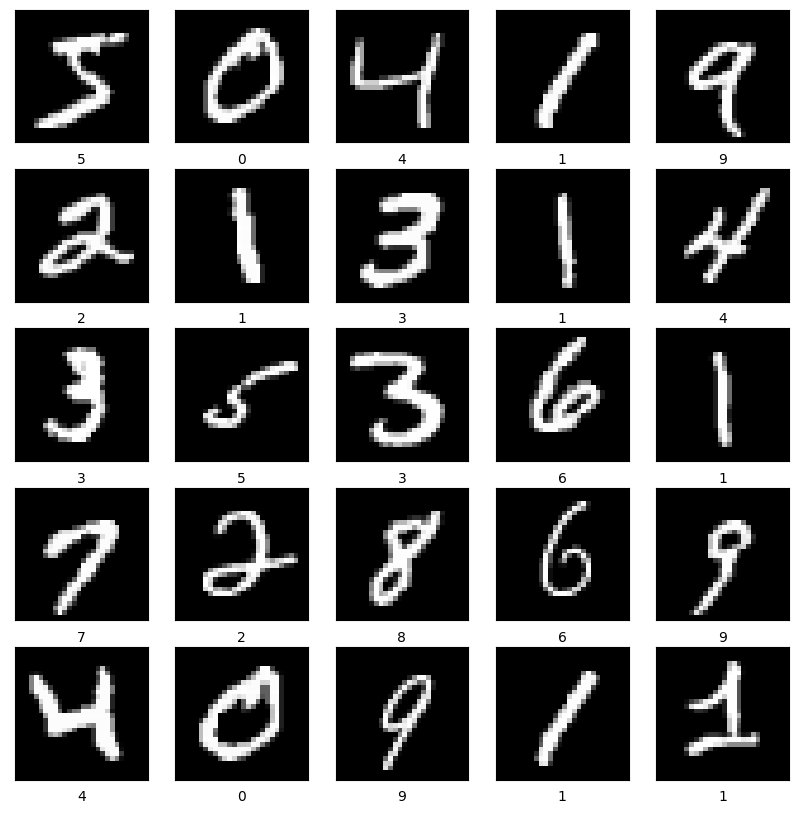

In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

# MNIST 데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(10, 10))

for index in range(25):
  plt.subplot(5, 5, index + 1)

  plt.xticks([])
  plt.yticks([])

  plt.grid(False)

  plt.imshow(X_train[index], cmap='gray')

  plt.xlabel(str(y_train[index]))
  
plt.show()

In [5]:
# 데이터를 float32 자료형으로 변환하고 정규화하기
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

X_train /= 255
X_test /= 255

# 레이블 데이터를 0-9까지의 카테고리를 나타내는 배열로 변환하기
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# 모델 구조 정의하기
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
# kfold와 랜덤 포레스트 사이 어떠한 것
# 0.8 만큼의 train을 섞어서 학습하는 작업

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [8]:
# 데이터 훈련하기
hist = model.fit(
  X_train,
  y_train,
  epochs=5,
  batch_size=16 # batch_size : 한 번에 학습하는 데이터의 크기를 말함
)

# 테스트 데이터로 평가하기
score = model.evaluate(
  X_test,
  y_test,
  verbose=1
)

print('\nLoss =', score[0])
print('Accuracy =', score[1])

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2162 - accuracy: 0.9334
Epoch 2/5
3750/3750 [==============================] - 14s 4ms/step - loss: 0.1142 - accuracy: 0.9657
Epoch 3/5
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0929 - accuracy: 0.9716
Epoch 4/5
3750/3750 [==============================] - 14s 4ms/step - lo

In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

model.save('Mnist_test')

new_load_model = tf.keras.models.load_model('Mnist_test')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

# `Keras`로 비만도 테스트

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split

# BMI 데이터를 읽어 들이고 정규화하기
csv = pd.read_csv("bmi.csv")

# 몸무게와 키 데이터
csv["weight"] /= 100
csv["height"] /= 200

X = csv[["weight", "height"]].to_numpy()

# 레이블
bclass = {
  "thin":[1,0,0],
  "normal":[0,1,0],
  "fat":[0,0,1]
}

y = np.empty((20000, 3))

for i, v in enumerate(csv["label"]):
  y[i] = bclass[v]

# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
# X_train, y_train = X[1:15001], y[1:15001]
# X_test, y_test = X[15001:20001], y[15001:20001]

X_train, X_test, y_train, y_test = train_test_split(
  X,
  y, 
  test_size=0.3,
  random_state=42
)


In [11]:
# 모델 구조 정의하기
model = Sequential()

model.add(Dense(512, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# 데이터 훈련하기
hist = model.fit(
  X_train,
  y_train,
  batch_size=100,
  epochs=20
)

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test, verbose=1)

print('Loss=', score[0])
print('Accuracy=', score[1])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
140/140 [==============================] - 1s 4ms/step - loss: 0.4800 - accuracy: 0.8131
Epoch 2/20
140/140 [==============================] - 1s 4ms/step - loss: 0.1512 - accuracy: 0.9516
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1124 - accuracy: 0.9573
Epoch 4/20
140/140 [==============================] - 1s 4ms/step - loss: 0.09

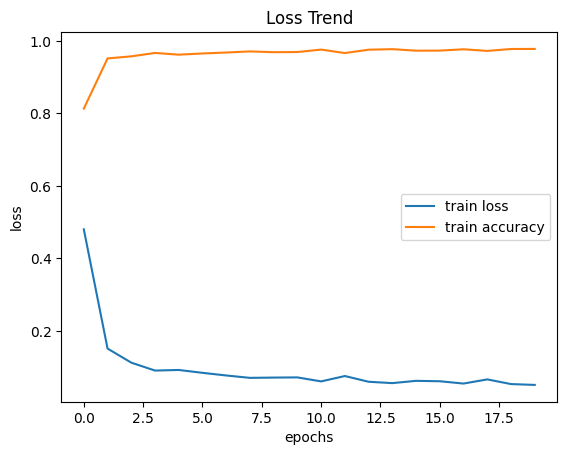

In [12]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')

plt.xlabel('epochs')
plt.ylabel('loss')

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['accuracy'], label='train accuracy')

plt.legend(loc='best')

plt.show()

# `tf.keras`로 실습하기 (`mnist` 데이터)

In [13]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

model = tf.keras.Sequential(
  layers=[tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")]
)

model.summary()

model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

history = model.fit(x_train, y_train, epochs=10)

# 케라스 모델의 정확도는 evaluate 메서드를 이용해서 확인
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print("\n테스트 정확도 :", test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'a

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 789us/step
예측값:7, 실제값:7


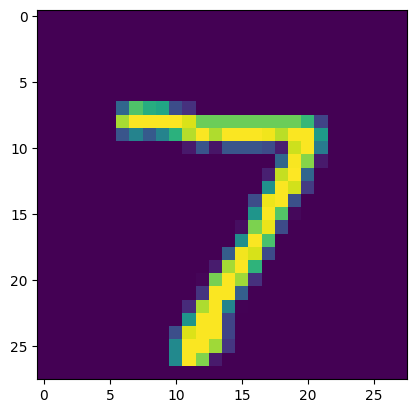

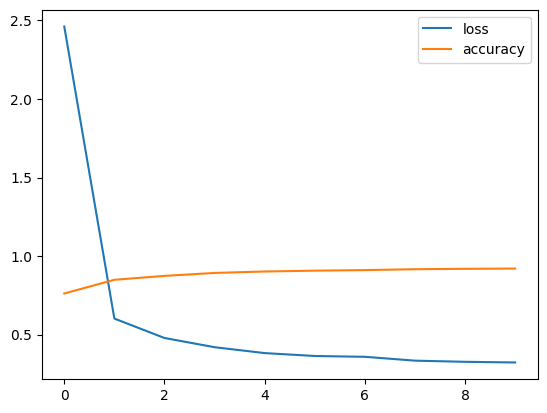

In [14]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
pred = np.argmax(predictions[0])

print("예측값:{}, 실제값:{}".format(pred, y_test[0]))

plt.imshow(x_test[0])

plt.show()

# history 객체는 모델이 매 epochs 마다 측정한 비용(loss)와 정확도를 기록한다.
history.history

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

plt.legend(["loss", "accuracy"])

plt.show()

# `tf.keras` 기본 이미지 분류 예제
- 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이다.<br><br>
  - 레이블(label)은 0에서 9까지의 정수 배열이며 이미지에 있는 옷의 클래스(class)를 나타낸다.<br><br>
- 레이블 : 클래스는 다음과 같다.<br><br>
  - 0 : `T-shirt/top`<br><br>
  - 1 : `Trouser`<br><br>
  - 2 : `Pullover`<br><br>
  - 3 : `Dress`<br><br>
  - 4 : `Coat`<br><br>
  - 5 : `Sandal`<br><br>
  - 6 : `Shirt`<br><br>
  - 7 : `Sneaker`<br><br>
  - 8 : `Bag`<br><br>
  - 9 : `Ankle boot`<br><br>

In [50]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터셋 임포트
fashion_mnist = keras.datasets.fashion_mnist

# train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
# test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag', 
  'Ankle boot'
]

# 데이터셋 구조 : 훈련 세트에 60,000개의 이미지, 각 이미지는 28x28 픽셀로 표현
train_images.shape

len(train_labels)

# 각 레이블은 0과 9사이의 정수
print(train_labels[0:100])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3 6 6 0 8 5
 2 1 6 6 7 9 5 9 2 7 3 0 3 3 3 7 2 2 6 6 8 3 3 5 0 5 5 0 2 0 0 4 1 3 1 6 3
 1 4 4 6 1 9 1 3 5 7 9 7 1 7 9 9 9 3 2 9 3 6 4 1 1 8]


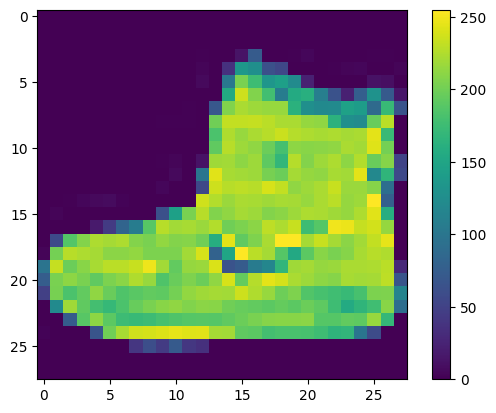

In [51]:
# 테스트 세트에는 10,000개의 이미지가 있으며 28x28 픽셀로 표현
test_images.shape

len(test_labels)

# 데이터 전처리 : 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.show()

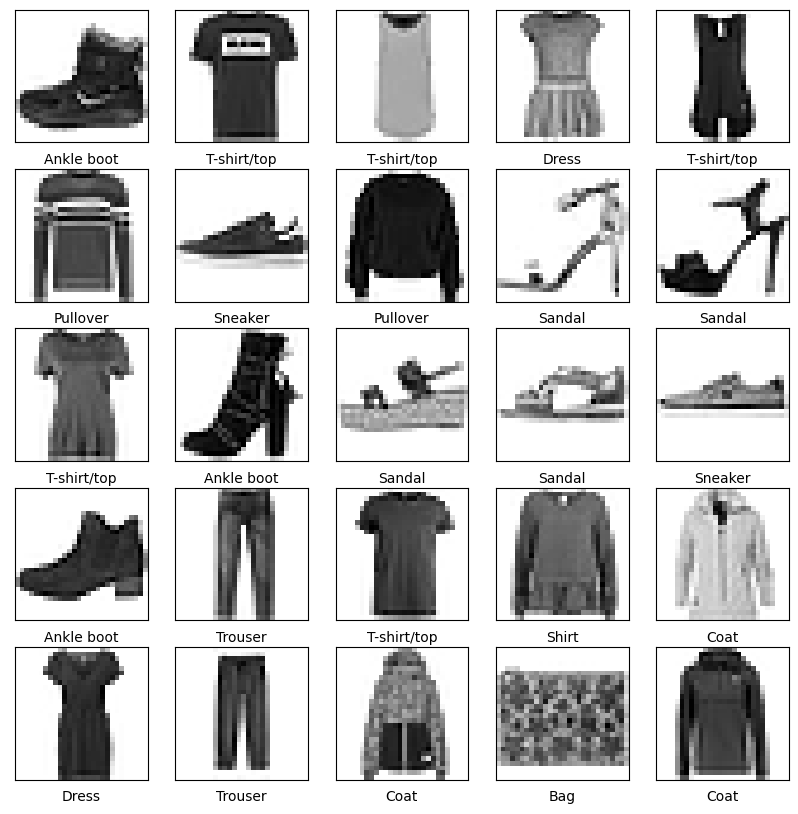

In [52]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)

  plt.xticks([])
  plt.yticks([])

  plt.grid(False)

  plt.imshow(train_images[i], cmap=plt.cm.binary)

  plt.xlabel(class_names[train_labels[i]])
  
plt.show()

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5003 - accuracy: 0.8267
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3409 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 

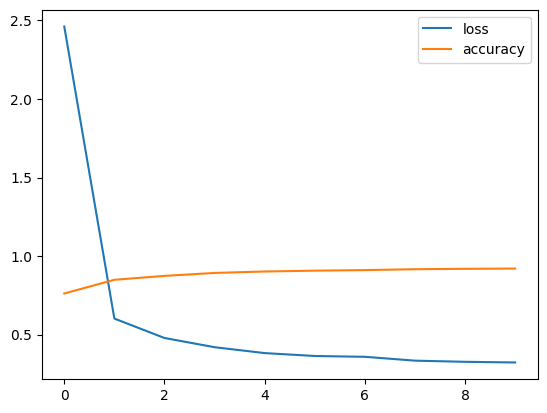

In [53]:
# 모델 구성
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')

])

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

# 모델 훈련
model.fit(train_images, train_labels, epochs=5)

# 손실과 정확도 그래프로 확인
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

plt.legend(["loss", "accuracy"])

plt.show()

In [54]:
# 정확도 평가
test_loss, test_acc = model.evaluate(
  test_images,
  test_labels,
  verbose=2
)

print('\n테스트 정확도:', test_acc)

# 예측 만들기
predictions = model.predict(test_images)

# 첫 번째 예측 확인
# 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타낸다.
predictions[0]

# 가장 높은 신뢰도를 가진 레이블
np.argmax(predictions[0])

test_labels[0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3595 - accuracy: 0.8729 - 364ms/epoch - 1ms/step

테스트 정확도: 0.8729000091552734
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.auto

9

In [55]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

  plt.grid(False)

  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(
    "{} {:2.0f}% ({})".format(class_names[predicted_label],
    100 * np.max(predictions_array),
    class_names[true_label]),
    color=color
  )
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]

  plt.grid(False)

  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(
    range(10),
    predictions_array,
    color="#424242"
  )

  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

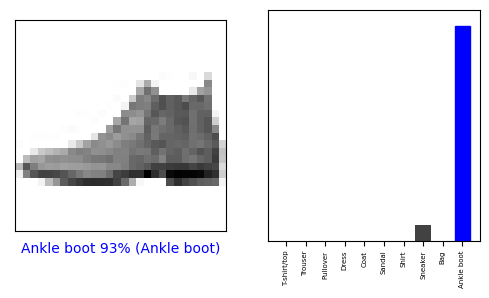

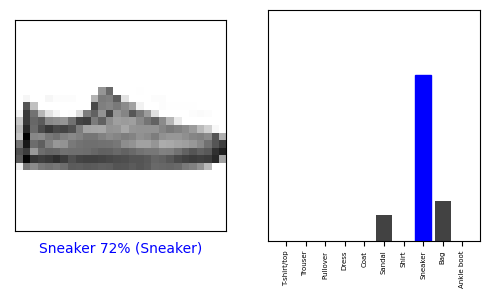

In [76]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(
  i,
  predictions,
  test_labels,
  test_images
)

plt.subplot(1, 2, 2)
plot_value_array(
  i,
  predictions,
  test_labels
)

_ = plt.xticks(
  range(10),
  class_names,
  rotation=90,
  fontsize=5
)

plt.show()

# 12번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
# 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(
  i,
  predictions,
  test_labels,
  test_images
)

plt.subplot(1, 2, 2)
plot_value_array(
  i,
  predictions,
  test_labels
)

_ = plt.xticks(
  range(10),
  class_names,
  rotation=90,
  fontsize=5
)

plt.show()


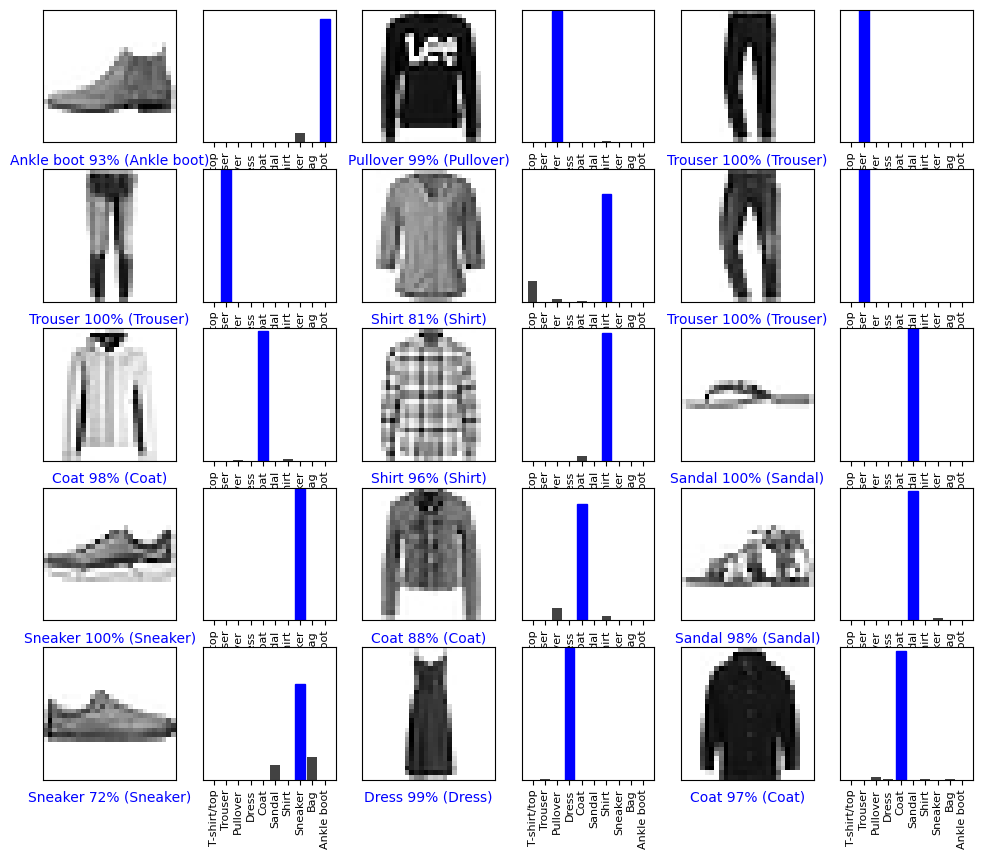

(28, 28)
(1, 28, 28)


In [77]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력한다.
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타낸다.
num_rows = 5
num_cols = 3

num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)

  _ = plt.xticks(
  range(10),
  class_names,
  rotation=90,
  fontsize=8
)

plt.show()

# 테스트 세트에서 이미지 하나를 선택한다
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)


1/1 [==============================] - 0s 16ms/step
[[6.7710482e-07 1.4952327e-07 1.1695874e-08 6.9884231e-07 3.3397743e-07
  5.8776385e-04 3.6897470e-06 6.9774568e-02 2.0913021e-06 9.2962998e-01]]


9

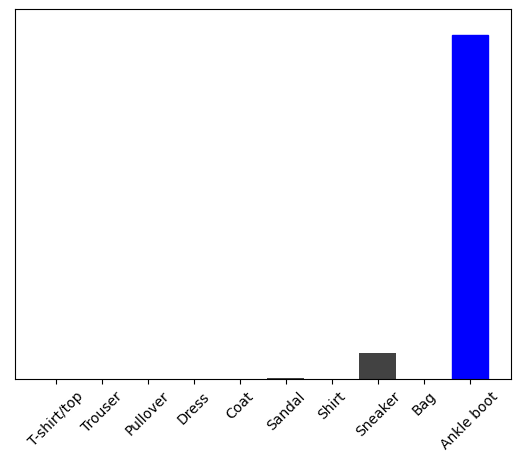

In [58]:
# 이 이미지의 예측 생성
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(
  0,
  predictions_single,
  test_labels
)

_ = plt.xticks(
  range(10),
  class_names,
  rotation=45
)

# model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측 선택
np.argmax(predictions_single[0])

In [80]:
%cd C:\Users\han12\OneDrive\Desktop\AIschool\Python\DL

C:\Users\han12\OneDrive\Desktop\AIschool\Python\DL
